In [204]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import interpolate as ip
import warnings
warnings.filterwarnings("ignore")

In [205]:
file_path="C://Users/Owner/source/tableau/unemployment-by-demo_proj/dataset/DataFinder_UR_Demo.xlsx"
ue_hl = pd.read_excel(io=file_path, sheet_name=0, keep_default_na=True, index_col=0, header=0, skiprows=17, engine="openpyxl")
ue_asian = pd.read_excel(io=file_path, sheet_name=1, keep_default_na=True, index_col=0, header=0, skiprows=17, engine="openpyxl")
ue_vet = pd.read_excel(io=file_path, sheet_name=2, keep_default_na=True, index_col=0, header=0, skiprows=18, engine="openpyxl")
ue_white= pd.read_excel(io=file_path, sheet_name=3, keep_default_na=True, index_col=0, header=0, skiprows=17, engine="openpyxl")
ue_aa = pd.read_excel(io=file_path, sheet_name=4, keep_default_na=True, index_col=0, header=0, skiprows=17, engine="openpyxl")

In [206]:
print("African American: {}" .format(ue_aa.mean()));
print("Hispanic and Latin: %s" %ue_hl.mean());
print("Caucasian: %s" %ue_white.mean());
print("Veteran: {}" .format(ue_vet.mean()));
print("Asian: %s" %ue_asian.mean());

# pd.Series([ue_aa.mean(),ue_asian.mean(),ue_white.mean(),ue_hl.mean(),ue_asian.mean()])

African American: Unemployment Rate    11.068249
dtype: float64
Hispanic and Latin: Unemployment Rate    8.630769
dtype: float64
Caucasian: Unemployment Rate    5.194444
dtype: float64
Veteran: Unemployment Rate    5.130833
dtype: float64
Asian: Unemployment Rate    4.781884
dtype: float64


Note: I left this commented code for me, mostly because I love me some me, and that future generations can see how the mind of a genius works; and to clearly see that Kayne West is my idol, but mostly for me to remember how I worked through solving the problem of filling in missing values or interpolation. The tools and APIs were there, but I wanted to explore and try to work the problem and try different things, let me mind work and explore. 

In [207]:

# work_space = ue_asian.reset_index()
# counter = 1
# twelve = 0
# periods = ["M12", "M11", "M10", "M09", "M08", "M07", "M06", "M05", "M04", "M03", "M02", "M01"]
# labels = ["Dec", "Nov", "Oct", "Sep", "Aug", "Jul", "Jun", "May", "Apr", "Mar", "Feb", "Jan"]

# work_space2 = pd.DataFrame()
# Lyear = []  
# while counter <= 11:
#     year = []
#     while twelve < 12:
#         year.append([str(int(work_space.iloc[0,0])-counter)]) 
#         twelve += 1
#     Lyear.append(year)
#     year.clear()
# counter += 1
# Lyear = Lyear.reverse()

# Lperiod = []
# rperiods = periods.reverse()
# while counter <= 11:
#     for period in rperiods:
#         Lperiod.append(period)
#     counter += 1
 
# Llabel = []
# rlabels = labels.reverse()
# while counter <= 11:
#     tlabel = []
#     while twelve < 12:
#         for label in rlabels:  
#             tlabel.append(str(int(work_space.iloc[0,0])-counter+" "+ label))
#         twelve += 1
#         Llabel.append(tlabel)
#         Llabel.clear()
#     counter += 1
           
# work_space  = pd.concat([Lyear, Lperiod, Llabel], axis=1, join="inner") 
# work_space2 = pd.concat([Lyear, Lperiod, Llabel], axis=1, join="inner") 
# work_space.head(3)

# str(int(work_space.iloc[0,0])-1), period, str(int(work_space.iloc[0,0])-1)+" "+ label
# print(int(work_space.iloc[0,0]) - 1)

# work_space["Unemployment Rate"].interpolate(method="polynomial", order=2, limit_direction="backward", limit = 1)]

# callable_ip = ip.interp1d(x = np.linspace(0, 10, num=335), y = ue_white["Unemployment Rate"][216:551], kind="linear")
# xrange = np.arange(0, 613, 1)
# ue_asian["Unemployment Rate"] = callable_ip(xrange)
# ip.interp1d(x=ue_asian["Year"], y=ue_asian["Unemployment Rate"], kind="polynomial")

# ue_asian = ue_asian.interpolate(method="polynomial", order=10, limit=2, limit_direction="backward")
# ue_asian["Unemployment Rate"] = ue_asian.fillna(value=ue_white[216:551], axis=0)


In [208]:
# Note: Interpolation of the data will be used for aesthetic purposes and will not affect core measures.
ue_asian = pd.concat([ue_white.iloc[216:551], ue_asian])
ue_asian

,Period,Label,Unemployment Rate
Year,,,
1972,M01,1972 Jan,5.2
1972,M02,1972 Feb,5.1
1972,M03,1972 Mar,5.2
1972,M04,1972 Apr,5.3
1972,M05,1972 May,5.1
...,...,...,...
2022,M08,2022 Aug,2.8
2022,M09,2022 Sep,2.5
2022,M10,2022 Oct,2.9


In [209]:
# Note: Interpolation of the data will be used for aesthetic purposes and will not affect core measures.
ue_vet = pd.concat([ue_white.iloc[216:599], ue_vet])
ue_asian

,Period,Label,Unemployment Rate
Year,,,
1972,M01,1972 Jan,5.2
1972,M02,1972 Feb,5.1
1972,M03,1972 Mar,5.2
1972,M04,1972 Apr,5.3
1972,M05,1972 May,5.1
...,...,...,...
2022,M08,2022 Aug,2.8
2022,M09,2022 Sep,2.5
2022,M10,2022 Oct,2.9


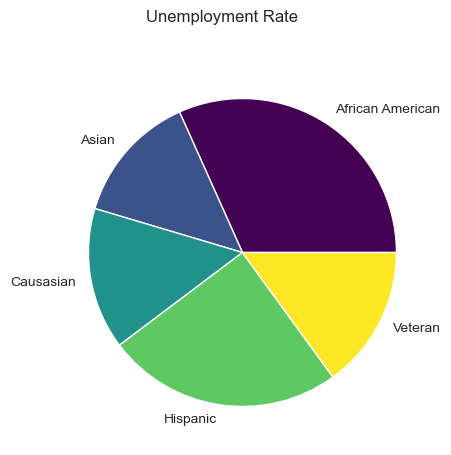

In [210]:
labels=["African American", "Asian", "Causasian", "Hispanic", "Veteran"]
pd.DataFrame([ue_aa.mean(),ue_asian.iloc[371:].mean(),ue_white.mean(),ue_hl.mean(),ue_vet.iloc[372:].mean()]).plot(kind="pie", subplots=True, labels=labels, figsize=(16,5), title='Unemployment Rate',
                                                                                             legend=False, ylabel=" ", colormap="viridis");




In [211]:
merge_aaa = ue_aa.merge(right=ue_asian.iloc[371:], how="inner", left_on="Label", right_on="Label", suffixes=("_AA","_Asian"))
merge_aaa.head(5)

,Period_AA,Label,Unemployment Rate_AA,Period_Asian,Unemployment Rate_Asian
0,M01,1972 Jan,11.2,M01,5.2
1,M02,1972 Feb,11.2,M02,5.1
2,M03,1972 Mar,10.7,M03,5.2
3,M04,1972 Apr,9.8,M04,5.3
4,M05,1972 May,10.2,M05,5.1


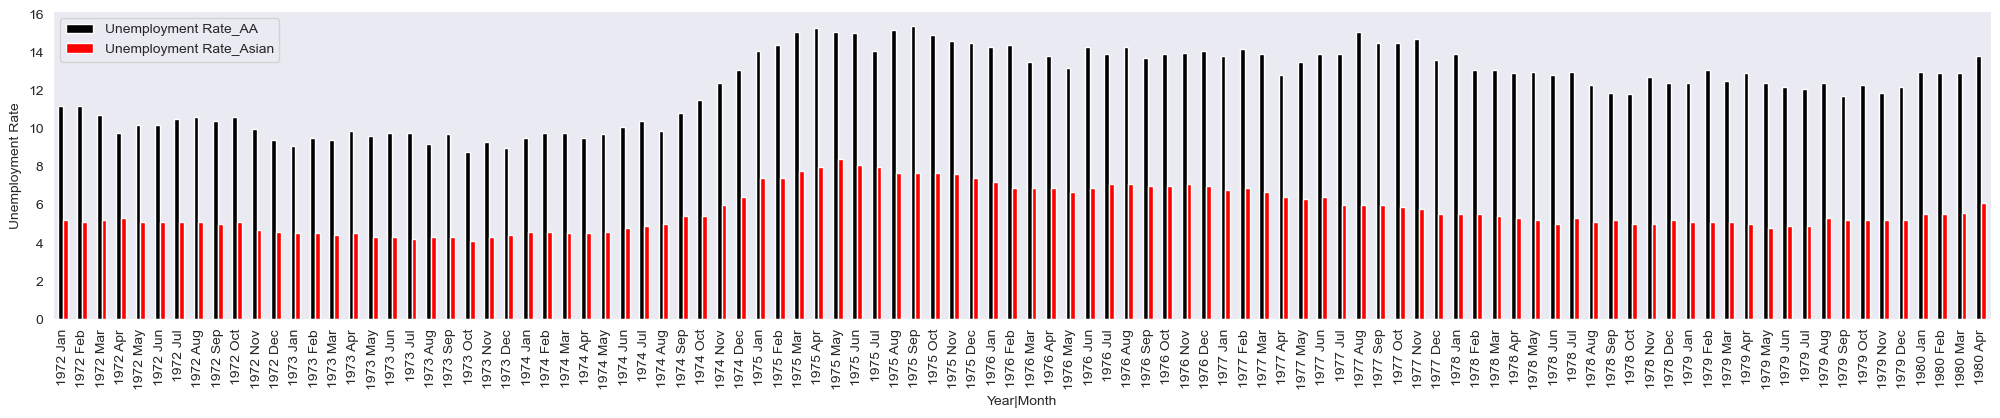

In [212]:

merge_aaa[371:470].plot.bar(x='Label', ylabel="Unemployment Rate", xlabel="Year|Month",  y=["Unemployment Rate_AA", "Unemployment Rate_Asian"], color=["black","red"], figsize=(25, 4));

In [213]:
merge_aawhite = ue_aa.merge(right=ue_white.iloc[372:], how="inner", left_on="Label", right_on="Label", suffixes=("_AA","_Caucasian"))
merge_aawhite.head(5)

,Period_AA,Label,Unemployment Rate_AA,Period_Caucasian,Unemployment Rate_Caucasian
0,M01,1972 Jan,11.2,M01,5.2
1,M02,1972 Feb,11.2,M02,5.1
2,M03,1972 Mar,10.7,M03,5.2
3,M04,1972 Apr,9.8,M04,5.3
4,M05,1972 May,10.2,M05,5.1


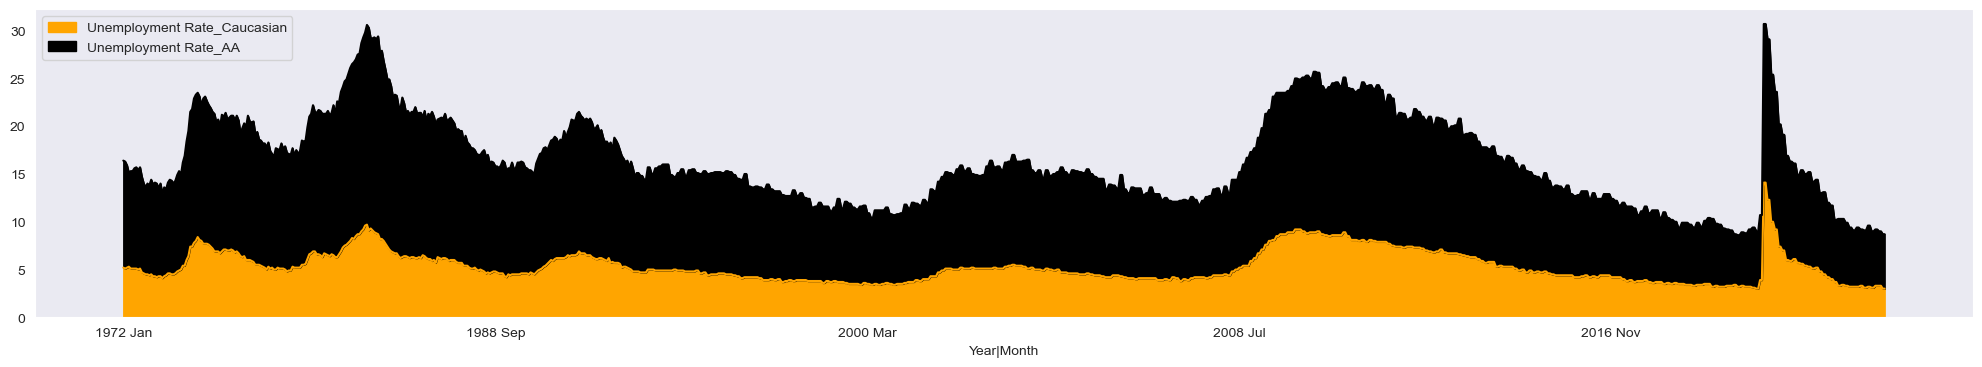

In [214]:
# merge_aawhite= pd.DataFrame(data=merge_aawhite, index="Label["2003 Jan","2007 Mar","2011 May","2015 Jul","2019 Sep"], columns=["Observation Value_aa","Observation Value_white"])
# merge_aawhite = merge_aawhite.Label["2003 Jan","2007 Mar","2011 May","2015 Jul","2019 Sep"]
merge_aawhite.plot.area(x="Label", xlabel="Year|Month", y=["Unemployment Rate_Caucasian", "Unemployment Rate_AA"], color=["orange", "black"], figsize=(25, 4));



In [215]:
merge_aahl = ue_aa.merge(right=ue_hl, how="inner", left_on="Label", right_on="Label", suffixes=("_AA","_HL"))
merge_aahl.head(5)

,Period_AA,Label,Unemployment Rate_AA,Period_HL,Unemployment Rate_HL
0,M03,1973 Mar,9.4,M03,7.3
1,M04,1973 Apr,9.9,M04,7.9
2,M05,1973 May,9.6,M05,8.1
3,M06,1973 Jun,9.8,M06,7.9
4,M07,1973 Jul,9.8,M07,7.2


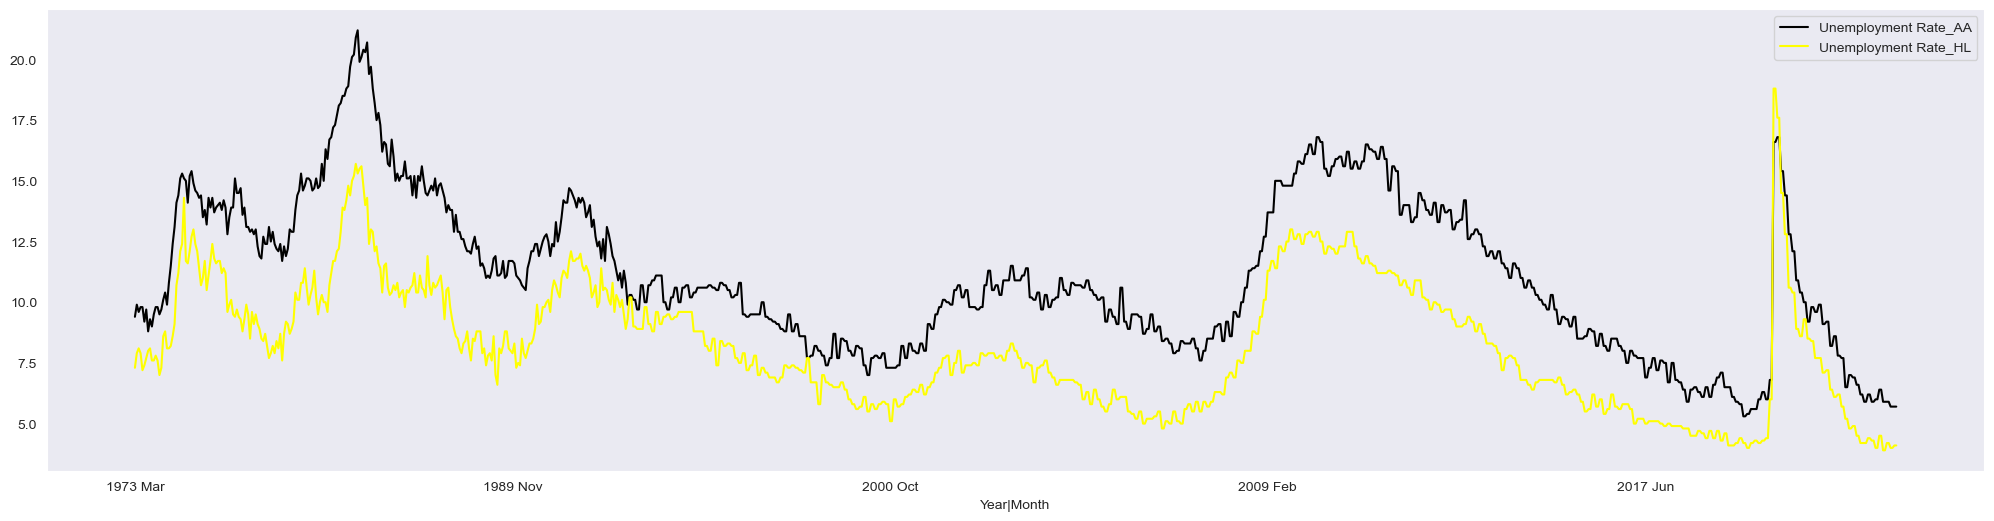

In [216]:
merge_aahl.plot.line(x="Label", xlabel="Year|Month", y=["Unemployment Rate_AA", "Unemployment Rate_HL"], color=["black","yellow"], figsize=(25, 6));

In [217]:
merge_aavet = ue_aa.merge(right=ue_vet.iloc[372:], how="inner", left_on="Label", right_on="Label", suffixes=("_AA","_Veteran"))
merge_aavet.head(5)

,Period_AA,Label,Unemployment Rate_AA,Period_Veteran,Unemployment Rate_Veteran
0,M01,1972 Jan,11.2,M01,5.2
1,M02,1972 Feb,11.2,M02,5.1
2,M03,1972 Mar,10.7,M03,5.2
3,M04,1972 Apr,9.8,M04,5.3
4,M05,1972 May,10.2,M05,5.1


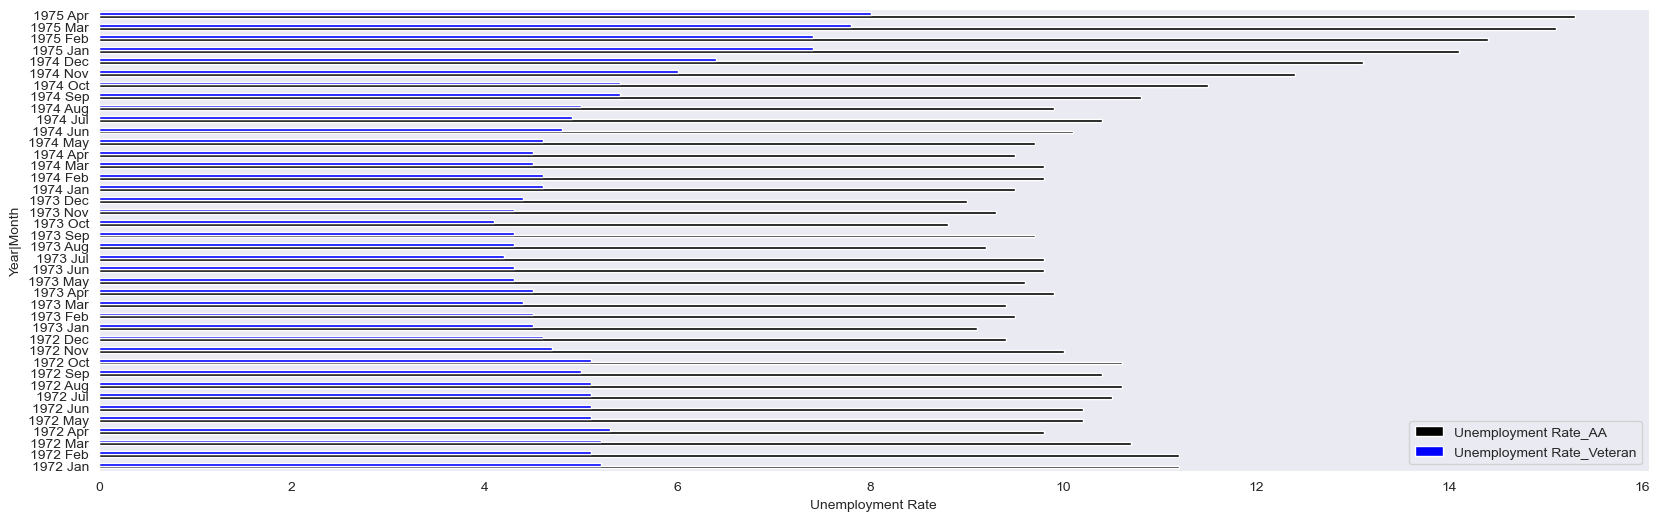

In [218]:
merge_aavet[0:40].plot.barh(x="Label", xlabel="Unemployment Rate", ylabel="Year|Month", ylim=("2003 Jan","2004 Jan"), y=["Unemployment Rate_AA", "Unemployment Rate_Veteran"], 
                            color=["black","blue"], figsize=(20, 6));

In [219]:
pivot_aa = ue_aa.pivot_table(values="Unemployment Rate", index="Label", aggfunc="mean", sort=True)
pivot_aa.head(5)

,Unemployment Rate
Label,
1972 Apr,9.8
1972 Aug,10.6
1972 Dec,9.4
1972 Feb,11.2
1972 Jan,11.2


In [220]:
pivot_asian = ue_asian.iloc[371:].pivot_table(values="Unemployment Rate", index="Label", aggfunc="mean", sort=True)
pivot_asian.head(5)

,Unemployment Rate
Label,
2003 Apr,6.0
2003 Aug,6.0
2003 Dec,5.4
2003 Feb,5.8
2003 Jan,5.5


In [221]:
pivot_hl = ue_hl.pivot_table(values="Unemployment Rate", index="Label", aggfunc="mean", sort=True)
pivot_hl.head(5)

,Unemployment Rate
Label,
1973 Apr,7.9
1973 Aug,7.4
1973 Dec,7.6
1973 Jul,7.2
1973 Jun,7.9


In [222]:

pivot_white = ue_white.pivot_table(values="Unemployment Rate", index="Label", aggfunc="mean", sort=True)
pivot_white.head(5)

,Unemployment Rate
Label,
1954 Apr,5.5
1954 Aug,5.6
1954 Dec,4.4
1954 Feb,4.9
1954 Jan,4.5


In [223]:
pivot_vet = ue_vet.iloc[372:].pivot_table(values="Unemployment Rate", index="Label", aggfunc="mean", sort=True)
pivot_vet.head(5)

,Unemployment Rate
Label,
2006 Apr,3.9
2006 Aug,3.4
2006 Dec,3.8
2006 Feb,4.0
2006 Jan,4.2


In [224]:
merge_1 = pd.merge(ue_aa,ue_asian, how="inner", left_on="Label", right_on="Label", sort=True,  suffixes=("_AA","_Asian"))
merge_2 = merge_1.merge(ue_white, how="inner", left_on="Label", right_on="Label", sort=True)
merge_3 = merge_2.merge(ue_hl, how="inner", left_on="Label", right_on="Label", sort=True)
merge_4 = merge_3.merge(ue_vet, how="inner", left_on="Label", right_on="Label", sort=True)
merge_fini = merge_4.drop(["Period","Period_Asian", "Period_x","Period_y", "Period"], axis=1).rename(columns={"Period_AA":"Period", "Label":"Month|Year", "Unemployment Rate_AA":"Unemployment Rate_AA","Unemployment Rate_Asian":"Unemployment Rate_Asian",\
    "Unemployment Rate_x":"Unemployment Rate_Causasian", "Unemployment Rate_y":"Unemployment Rate_HL", "Unemployment Rate":"Unemployment Rate_Veteran" }).set_index("Month|Year")
merge_fini



,Period,Unemployment Rate_AA,Unemployment Rate_Asian,Unemployment Rate_Causasian,Unemployment Rate_HL,Unemployment Rate_Veteran
Month|Year,,,,,,
1973 Apr,M04,9.9,4.5,4.5,7.9,4.5
1973 Aug,M08,9.2,4.3,4.3,7.4,4.3
1973 Dec,M12,9.0,4.4,4.4,7.6,4.4
1973 Jul,M07,9.8,4.2,4.2,7.2,4.2
1973 Jun,M06,9.8,4.3,4.3,7.9,4.3
...,...,...,...,...,...,...
2022 Nov,M11,5.7,2.6,3.3,4.0,2.7
2022 Oct,M10,5.9,2.9,3.3,4.2,2.7
2022 Oct,M10,5.9,2.9,3.3,4.2,2.7


<AxesSubplot: title={'center': 'Unemployment Rate by Demographic: Race'}, xlabel='Month|Year', ylabel='Unemployment Rate'>

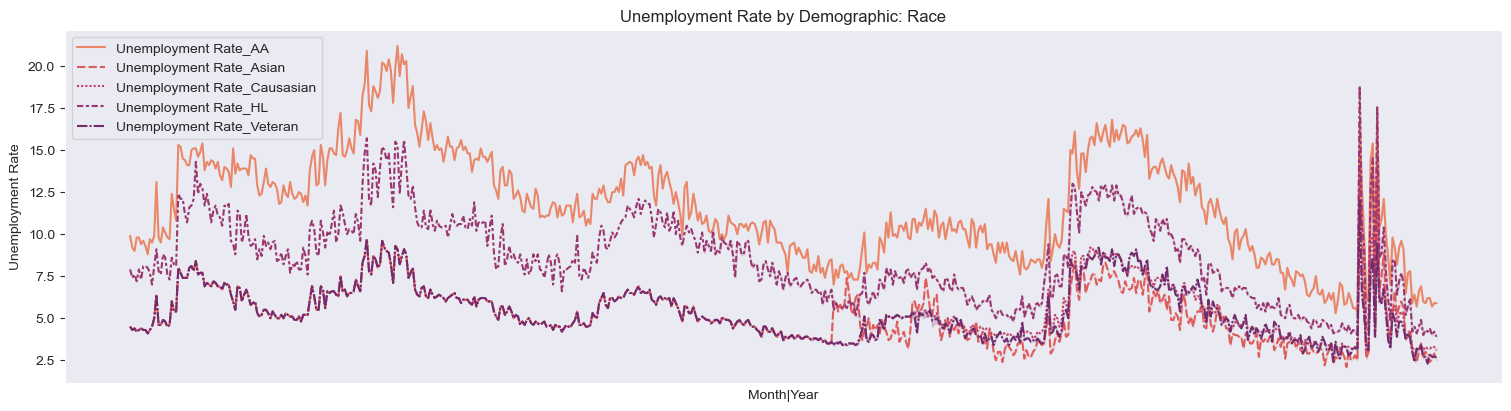

In [225]:

fig, axe = plt.subplots(nrows=1,ncols=1, constrained_layout=True, figsize=(15, 4))
axe.tick_params(left = True, right = False , labelleft = True ,
                labelbottom = False, bottom = False)
axe.set_title("Unemployment Rate by Demographic: Race")
axe.set_xlabel("Month|Year")
axe.set_ylabel("Unemployment Rate")
sns.set_style("dark")
sns.lineplot(merge_fini, palette="flare", ax=axe)



### Final Analysis

Data is not just the canary in the coal mine, it is the Oracle of Delphi or the fake Jamaican psychic Miss Cleo asking you to, "call mae now" [fake Jamaican accent]. Man has always sought divine divination through pyromancy, hydromancy, and even whatevermancy. It is the reason you ask grandma not to chew down the chicken bones with nothing but the gums. More importantly data tells a story, not of mystics and magic, but of real people with real lives; hopes and dreams. What this data suggests is that a person or persons of certain demographic has historically and continue to have the highest rates of unemployment since the BLS (Bureau of Labor and Statistics) has been collecting the data. All things being equal, there is a high probability that it will continue into the future if not for entropy or deterministic events to changes the current trajectory. These events and outcomes are not probabilistic or statistically independent and there is no information content or surprise. Without any discernible mathematical tool one can simple eye-ball the numbers and determine this truth to be self-evident. The magnitude of the correlation between the unemployment rate and demographics is strong. Unfortunately, the outcomes of this phenomenon is outside the scope of this study, but I surmise that like a punch to the face by Mike Tyson or listening to him read poetry the situation may be grave. 